In [10]:
import matplotlib.pyplot as plt
plt.style.use("/Users/jlazar/research/prometheus/paper_plots/paper.mplstyle")

In [11]:
import numpy as np
from glob import glob

In [54]:
plt.rcParams["text.usetex"] = True

In [55]:
def parse_line(line, outarr):
    splitline = line.split()
    if len(splitline)!=6:
        return
    elif 'ppc_photon_propagator.py:87' in splitline[-1]:
        idx = 0
    elif 'prometheus.py:158' in splitline[-1]:
        idx = 1
    elif 'prometheus.py:252' in splitline[-1]:
        idx = 2
    elif "lepton_propagator.py" in splitline[-1]:
        idx = 3
    elif "prometheus.py:243" in splitline[-1]:
        idx = 4
    else:
        return
    outarr[idx] += float(splitline[3])

In [56]:
def mims(outarr):
    total = outarr[:, 4]
    photon_prop = outarr[:, 0] - outarr[:, 3]
    lepton_prop = outarr[:, 3]
    injection = outarr[:, 1]
    output = outarr[:, 2]
    misc = total - (output + injection + lepton_prop + photon_prop)
    we = np.zeros((outarr.shape[0], 6))
    we[:, 0] = misc
    we[:, 1] = injection
    we[:, 2] = output
    we[:, 3] = lepton_prop
    we[:, 4] = photon_prop
    we[:, 5] = total
    return we

In [57]:
def prepare_output(timing_dir):

    fs = glob(f"{timing_dir}/*summary*")
    es = []
    outarr = np.zeros((len(fs), 5))
    for idx, f in enumerate(fs):

        splitname = f.split("/")[-1].split("_")
        while len(splitname) > 0:
            test_e = splitname.pop()
            try:
                e = float(test_e)
                break
            except ValueError:
                pass
        es.append(e)
        with open(f, "r") as infile:
            for line in infile.readlines():
                parse_line(line, outarr[idx, :])

    sorter = np.argsort(es)
    es = np.array(es)[sorter]
    we = mims(outarr)
    we = we[sorter, :]

    return es, we

In [58]:
def make_plot(es, output, ax=None):

    labels = [
        "Miscellaneous",
        "Injection",
        "Saving output",
        "Lepton propagation",
        "Photon propagation",
    ]

    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))
    
    for x in range(len(labels)):
        label = labels[x]

        if x == 0:
            y1 = np.zeros(len(output[:, x]))
        else:
            y1 = np.sum(output[:, :x], axis=1)
        y2 = np.sum(output[:, :x+1], axis=1)

        ax.fill_between(es, y1, y2, label=label)
        ax.plot(es, y2, color="k", lw=1.5)
    
   
    return ax

In [59]:
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch

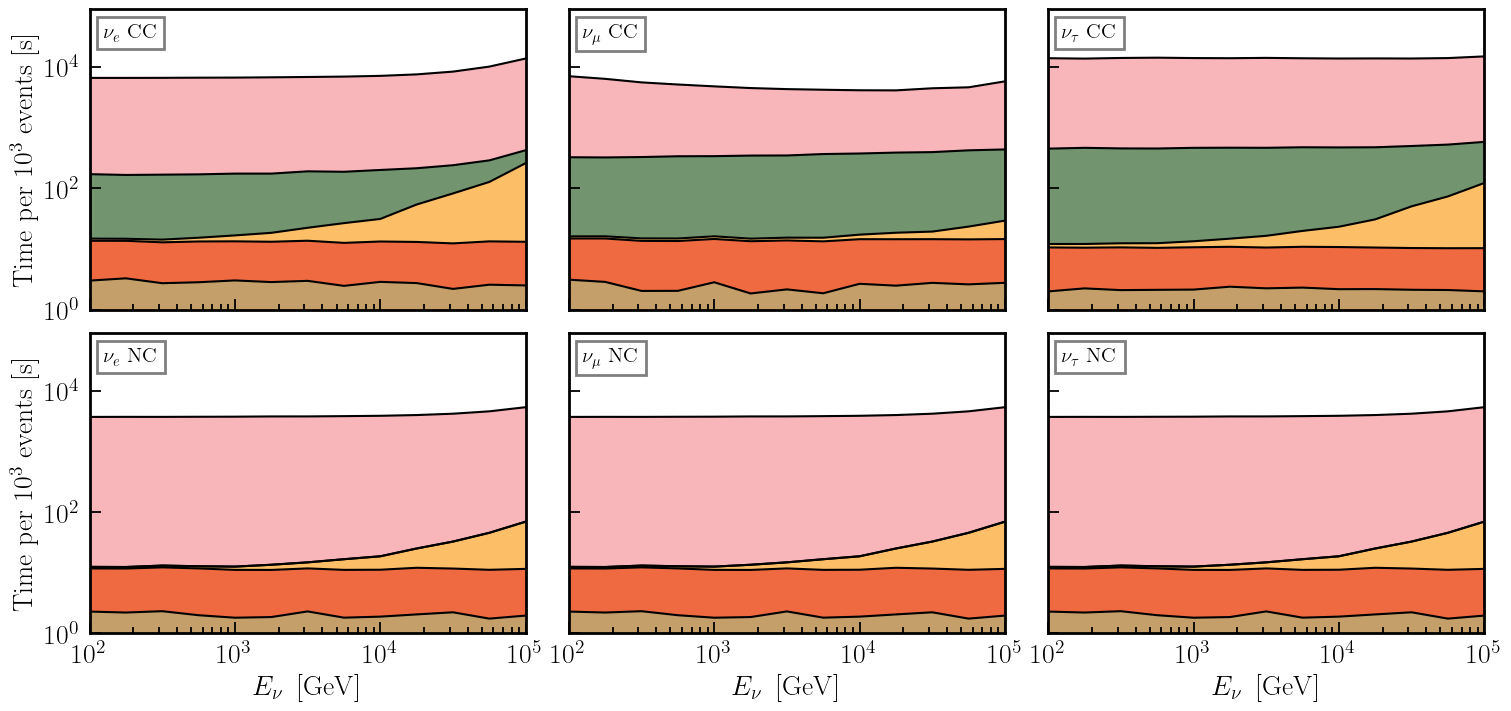

In [89]:
fig = plt.figure(
    constrained_layout=True,
    figsize=(15, 7)
)

gs = GridSpec(2, 3, figure=fig, wspace=0.004, hspace=0.025)

timing_dirs = ["EMinus/", "MuMinus/", "TauMinus/", "NuE/", "NuE/", "NuE/"]
labels = [r'$\nu_{e}$ CC', r'$\nu_{\mu}$ CC', r'$\nu_{\tau}$ CC', r'$\nu_{e}$ NC', r'$\nu_{\mu}$ NC', r'$\nu_{\tau}$ NC']
for idx, (label, timing_dir) in enumerate(zip(labels, timing_dirs)):
    row = 0
    col = idx % 3
    if idx > 2:
        row = 1
    ax = fig.add_subplot(gs[row, col])
    es, output = prepare_output(timing_dir)
    ax = make_plot(es, output, ax=ax)
    ax.loglog()
    ax.text(
        125,
        3e4,
        label,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5}, fontsize=15
    )
    if col!=0:
        ax.set_yticklabels([])
    if row==0:
        ax.set_xticklabels([])
    ax.set_xlim(100, 1e5)
    ax.set_ylim(1, 9e4)
    if row==1:
        ax.set_xlabel(r"$E_{\nu}~\left[\rm{GeV}\right]$")
    if col==0:
        ax.set_ylabel(r"Time per $10^3$ events [s]")
    [i.set_linewidth(2) for i in ax.spines.values()]
plt.savefig("prometheus_timing.pdf")
plt.show()
# ax.legend(handles=handles, bbox_to_anchor=(1,1))

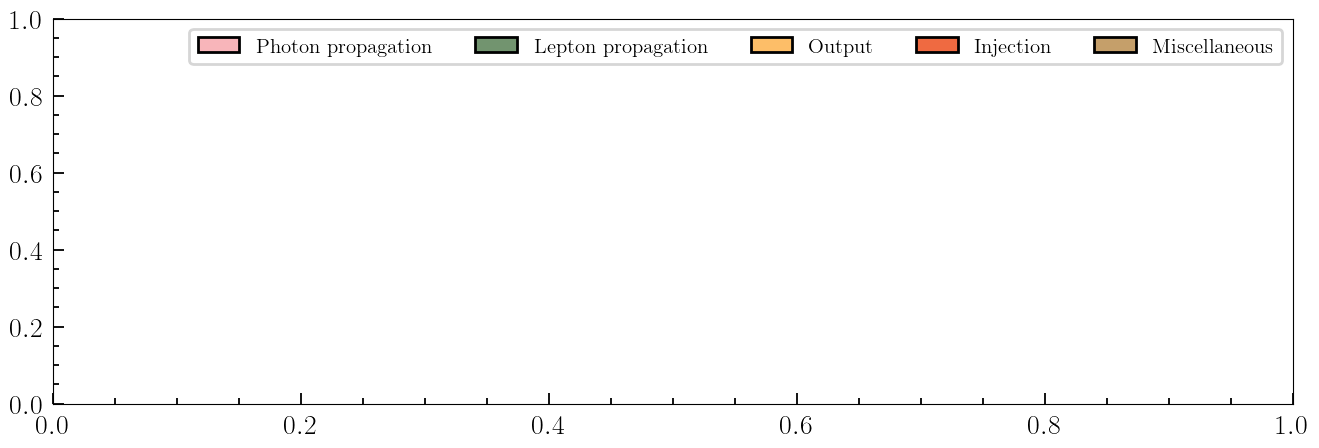

In [88]:
from matplotlib.patches import Patch

handles = [
    Patch(edgecolor="k", label="Photon propagation", facecolor=plt.rcParams["axes.prop_cycle"].by_key()['color'][4]),
    Patch(edgecolor="k", label="Lepton propagation", facecolor=plt.rcParams["axes.prop_cycle"].by_key()['color'][3]),
    Patch(edgecolor="k", label="Output", facecolor=plt.rcParams["axes.prop_cycle"].by_key()['color'][2]),
    Patch(edgecolor="k", label="Injection", facecolor=plt.rcParams["axes.prop_cycle"].by_key()['color'][1]),
    Patch(edgecolor="k", label="Miscellaneous", facecolor=plt.rcParams["axes.prop_cycle"].by_key()['color'][0]),
]
fig = plt.figure(figsize=(16,5))
plt.legend(handles=handles, ncol=5, fontsize=15)
plt.savefig("jank_legend.pdf")
plt.show()

In [74]:
plt.rcParams["axes.prop_cycle"].by_key()['color'][0]

'#C59F6A'